In [81]:
#распознавание рукописного текста
import numpy as np
print (np.__version__)
#pip install numpy --upgrade
from keras.preprocessing import image

from keras.datasets import mnist#-классификация рукописных цифр
from keras.models import Sequential#модель нейронной сети слои которой соединены друг с другом
from keras.layers import Dense#соединение всех нейронов предыдущего уровня со всми нейронами следующего уровня
from keras.utils import np_utils#утилиты для работы с массивами
from keras.models import model_from_json
import matplotlib.pyplot as plt
#pip install --upgrade --force-reinstall matplotlib==2.0.0
%matplotlib inline

# Устанавливаем seed для повторяемости результатов
np.random.seed(42)


#Загружаем обученную нейронную сеть из файла

# Загружаем данные об архитектуре сети из файла json
json_file = open("mnistreal_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("mnistreal_model.h5")

#Перед использованием модели, ее обязательно нужно скомпилировать:

# Компилируем модель
loaded_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])



1.14.0


3


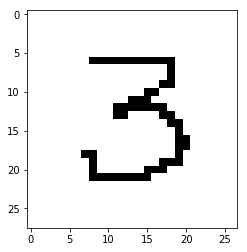

In [94]:
#Поверяем на реальном примере
# Загружаем изображение
img_path = '3.png'
img = image.load_img(img_path, target_size=(28, 28), grayscale=True)

#from PIL import Image, ImageDraw #Подключим необходимые библиотеки.
#image = Image.open("9.png") #Открываем изображение.

im = plt.imread('3.png')
plt.imshow(im,cmap="gray")
plt.show

# Преобразуем изображением в массив numpy
x = image.img_to_array(img)

# Инвертируем и нормализуем изображение
# Инверсия нужна потому что 0 - это белый, 255 - это черный,
# а в популярных форматах хранения данных все наоборот
x = 255 - x
x /= 255
x = np.expand_dims(x, axis=0)

prediction = loaded_model.predict(x)



print(np.argmax(prediction))

3
